# Task-2: Prediction using unsupervised ML

## Presented By: Shafrin Sultana

### Importing necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np


### Importing Data


In [2]:
myData=pd.read_csv('data_2.xls')


### Show Data Table


In [3]:
myData.shape

(150, 6)

In [4]:
myData.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Data Visualization

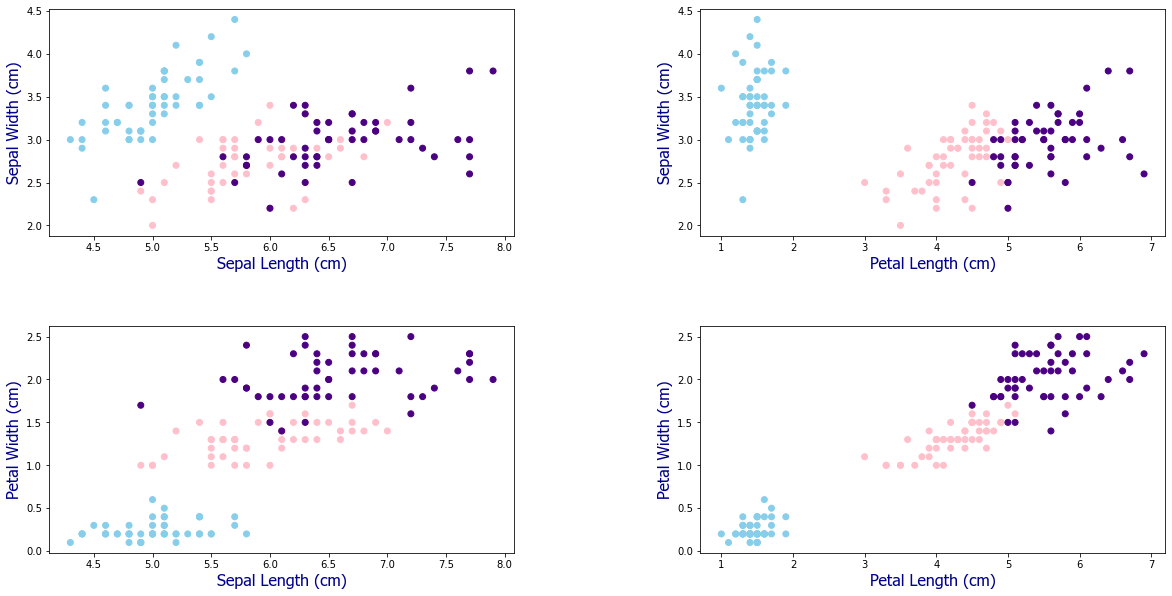

In [5]:

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10),
                       gridspec_kw={
                           'width_ratios': [3, 3],
                           'height_ratios': [3, 3],
                       'wspace': 0.4,
                       'hspace': 0.4})
titleFont = {'family': 'Tahoma',
        'color':  'darkblue',
        'weight': 'bold',
        'size': 20,
        }
labelFont = {'family': 'Tahoma',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }
ax[0,0].set_xlabel('Sepal Length (cm)',fontdict=labelFont)
ax[0,0].set_ylabel('Sepal Width (cm)',fontdict=labelFont)
ax[1,0].set_xlabel('Sepal Length (cm)',fontdict=labelFont)
ax[1,0].set_ylabel('Petal Width (cm)',fontdict=labelFont)
ax[0,1].set_xlabel('Petal Length (cm)',fontdict=labelFont)
ax[0,1].set_ylabel('Sepal Width (cm)',fontdict=labelFont)
ax[1,1].set_xlabel('Petal Length (cm)',fontdict=labelFont)
ax[1,1].set_ylabel('Petal Width (cm)',fontdict=labelFont)
Species={'Iris-virginica':'indigo','Iris-setosa':'skyblue','Iris-versicolor':'pink'}
ax[0,0].scatter(myData['SepalLengthCm'], myData['SepalWidthCm'], c=myData['Species'].map(Species),marker='o')
ax[1,0].scatter(myData['SepalLengthCm'], myData['PetalWidthCm'], c=myData['Species'].map(Species),marker='o')
ax[0,1].scatter(myData['PetalLengthCm'], myData['SepalWidthCm'], c=myData['Species'].map(Species),marker='o')
ax[1,1].scatter(myData['PetalLengthCm'], myData['PetalWidthCm'], c=myData['Species'].map(Species),marker='o')

plt.show()

### Determine the optimum number of clusters using the elbow method

In [6]:


dataSet1=myData.loc[:,['SepalLengthCm','SepalWidthCm']]
X=np.array(dataSet1)
distortions1 = []


K = range(1, 12)
 
for k in K:
    
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions1.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    
    
   

In [7]:


dataSet1=myData.loc[:,['SepalLengthCm','PetalWidthCm']]
X=np.array(dataSet1)
distortions2 = []


K = range(1, 12)
 
for k in K:
    
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions2.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    
    
   

In [8]:


dataSet1=myData.loc[:,['PetalLengthCm','SepalWidthCm']]
X=np.array(dataSet1)
distortions3 = []


K = range(1, 12)
 
for k in K:
    
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions3.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    
    
   

In [9]:


dataSet1=myData.loc[:,['PetalLengthCm','PetalWidthCm']]
X=np.array(dataSet1)
distortions4 = []


K = range(1, 12)
 
for k in K:
    
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions4.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    
    
   

### Visualize and select the optimum value of K by using the elbow method

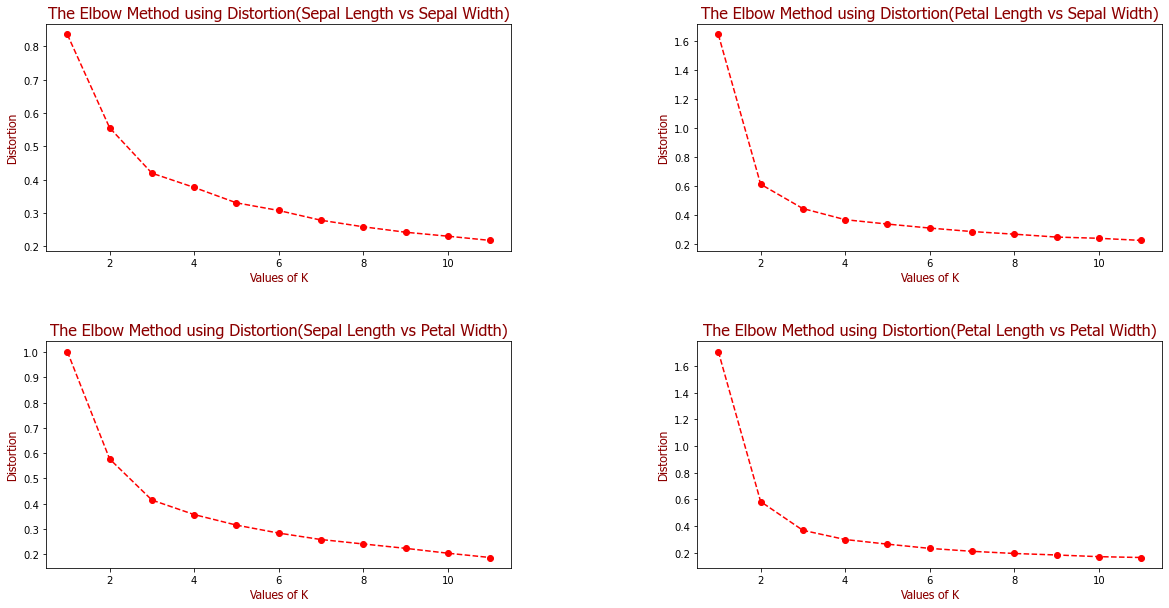

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10),
                       gridspec_kw={
                           'width_ratios': [3, 3],
                           'height_ratios': [3, 3],
                       'wspace': 0.4,
                       'hspace': 0.4})
titleFont = {'family': 'Tahoma',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
labelFont = {'family': 'Tahoma',
        'color':  'darkred',
        'weight': 'normal',
        'size': 12,
        }
ax[0,0].plot(K, distortions1,'--ro')
ax[0,0].set_xlabel('Values of K',fontdict=labelFont)
ax[0,0].set_ylabel('Distortion',fontdict=labelFont)
ax[0,0].set_title('The Elbow Method using Distortion(Sepal Length vs Sepal Width)',fontdict=titleFont)

ax[1,0].plot(K, distortions2,'--ro')
ax[1,0].set_xlabel('Values of K',fontdict=labelFont)
ax[1,0].set_ylabel('Distortion',fontdict=labelFont)
ax[1,0].set_title('The Elbow Method using Distortion(Sepal Length vs Petal Width)',fontdict=titleFont)

ax[0,1].plot(K, distortions3,'--ro')
ax[0,1].set_xlabel('Values of K',fontdict=labelFont)
ax[0,1].set_ylabel('Distortion',fontdict=labelFont)
ax[0,1].set_title('The Elbow Method using Distortion(Petal Length vs Sepal Width)',fontdict=titleFont)

ax[1,1].plot(K, distortions4,'--ro')
ax[1,1].set_xlabel('Values of K',fontdict=labelFont)
ax[1,1].set_ylabel('Distortion',fontdict=labelFont)
ax[1,1].set_title('The Elbow Method using Distortion(Petal Length vs Petal Width)',fontdict=titleFont)

plt.show()

#### To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

### The clustered data points for k=3 in Sepal length vs Sepal width

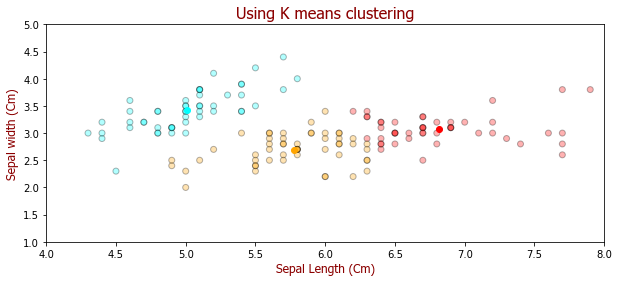

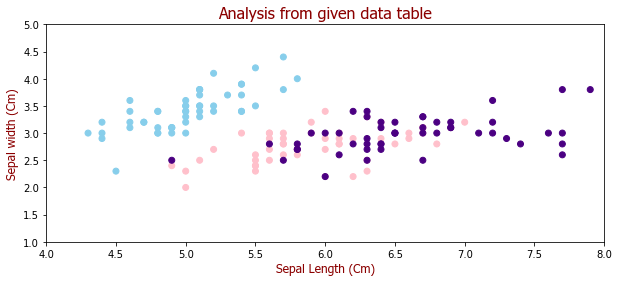

In [11]:
X=myData.loc[:,['SepalLengthCm','SepalWidthCm']]

kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(X)
labels=kmeanModel.predict(X)
centroids=kmeanModel.cluster_centers_
fig=plt.figure(figsize=(10,4))
colmap={1:'r',2:'cyan',3:'orange'}
colors=map(lambda x: colmap[x+1],labels)
color1=list(colors)
plt.scatter(X['SepalLengthCm'],X['SepalWidthCm'],color=color1,alpha=0.3,edgecolor='k')

for idx,centroid in enumerate (centroids):
    plt.scatter(*centroid,color=colmap[idx+1])
plt.xlabel('Sepal Length (Cm)',fontdict=labelFont)
plt.ylabel('Sepal width (Cm)',fontdict=labelFont)
plt.title('Using K means clustering',fontdict=titleFont)
plt.xlim(4,8)
plt.ylim(1,5)
plt.show()

Species={'Iris-virginica':'indigo','Iris-setosa':'skyblue','Iris-versicolor':'pink'}
fig=plt.figure(figsize=(10,4))
plt.scatter(myData['SepalLengthCm'], myData['SepalWidthCm'], c=myData['Species'].map(Species),marker='o')
plt.xlabel('Sepal Length (Cm)',fontdict=labelFont)
plt.ylabel('Sepal width (Cm)',fontdict=labelFont)
plt.title('Analysis from given data table',fontdict=titleFont)
plt.xlim(4,8)
plt.ylim(1,5)
plt.show()

### The clustered data points for k=3 in Petal length vs Sepal width

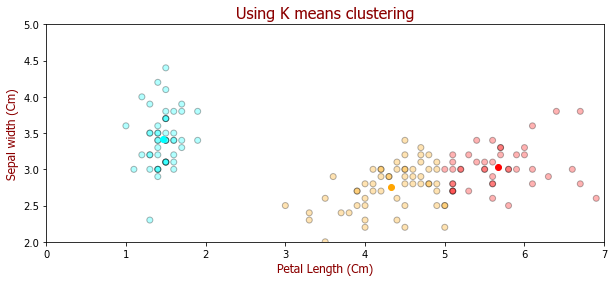

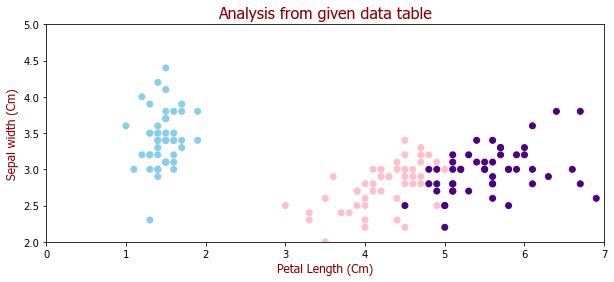

In [12]:
X=myData.loc[:,['PetalLengthCm','SepalWidthCm']]

kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(X)
labels=kmeanModel.predict(X)
centroids=kmeanModel.cluster_centers_
fig=plt.figure(figsize=(10,4))
colmap={1:'r',2:'cyan',3:'orange'}
colors=map(lambda x: colmap[x+1],labels)
color1=list(colors)
plt.scatter(X['PetalLengthCm'],X['SepalWidthCm'],color=color1,alpha=0.3,edgecolor='k')

for idx,centroid in enumerate (centroids):
    plt.scatter(*centroid,color=colmap[idx+1])
plt.xlabel('Petal Length (Cm)',fontdict=labelFont)
plt.ylabel('Sepal width (Cm)',fontdict=labelFont)
plt.title('Using K means clustering',fontdict=titleFont)
plt.xlim(0,7)
plt.ylim(2,5)
plt.show()

Species={'Iris-virginica':'indigo','Iris-setosa':'skyblue','Iris-versicolor':'pink'}
fig=plt.figure(figsize=(10,4))
plt.scatter(myData['PetalLengthCm'], myData['SepalWidthCm'], c=myData['Species'].map(Species),marker='o')
plt.xlabel('Petal Length (Cm)',fontdict=labelFont)
plt.ylabel('Sepal width (Cm)',fontdict=labelFont)
plt.title('Analysis from given data table',fontdict=titleFont)
plt.xlim(0,7)
plt.ylim(2,5)
plt.show()

### The clustered data points for k=3 in Sepal length vs Petal width

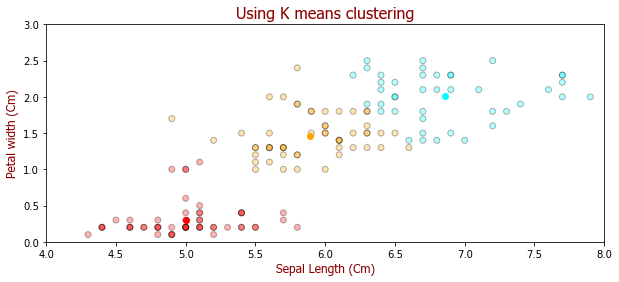

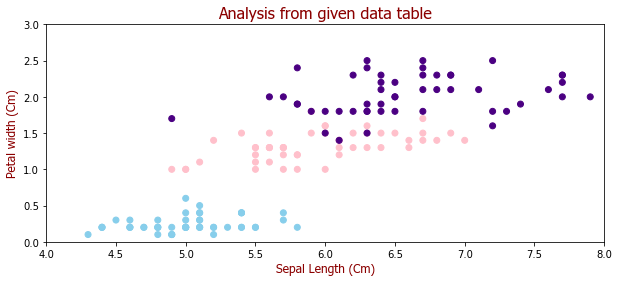

In [13]:
X=myData.loc[:,['SepalLengthCm','PetalWidthCm']]

kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(X)
labels=kmeanModel.predict(X)
centroids=kmeanModel.cluster_centers_
fig=plt.figure(figsize=(10,4))
colmap={1:'r',2:'cyan',3:'orange'}
colors=map(lambda x: colmap[x+1],labels)
color1=list(colors)
plt.scatter(X['SepalLengthCm'],X['PetalWidthCm'],color=color1,alpha=0.3,edgecolor='k')

for idx,centroid in enumerate (centroids):
    plt.scatter(*centroid,color=colmap[idx+1])
plt.xlim(4,8)
plt.ylim(0,3)
plt.xlabel('Sepal Length (Cm)',fontdict=labelFont)
plt.ylabel('Petal width (Cm)',fontdict=labelFont)
plt.title('Using K means clustering',fontdict=titleFont)
plt.show()

Species={'Iris-virginica':'indigo','Iris-setosa':'skyblue','Iris-versicolor':'pink'}
fig=plt.figure(figsize=(10,4))
plt.scatter(myData['SepalLengthCm'], myData['PetalWidthCm'], c=myData['Species'].map(Species),marker='o')
plt.xlabel('Sepal Length (Cm)',fontdict=labelFont)
plt.ylabel('Petal width (Cm)',fontdict=labelFont)
plt.title('Analysis from given data table',fontdict=titleFont)
plt.xlim(4,8)
plt.ylim(0,3)
plt.show()

### The clustered data points for k=3 in Petal length vs Petal width

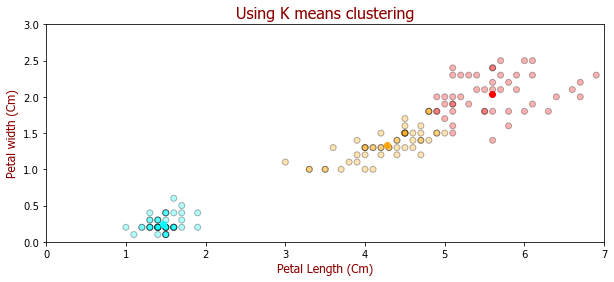

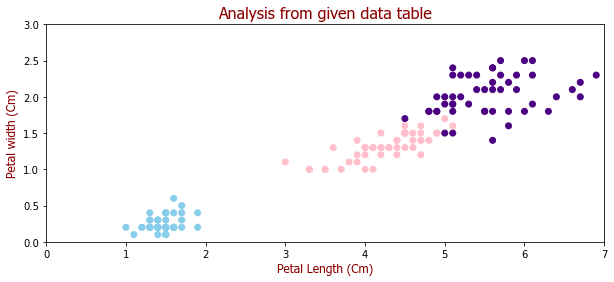

In [14]:

X=myData.loc[:,['PetalLengthCm','PetalWidthCm']]

kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(X)
labels=kmeanModel.predict(X)
centroids=kmeanModel.cluster_centers_
fig=plt.figure(figsize=(10,4))
colmap={1:'r',2:'cyan',3:'orange'}
colors=map(lambda x: colmap[x+1],labels)
color1=list(colors)
plt.scatter(X['PetalLengthCm'],X['PetalWidthCm'],color=color1,alpha=0.3,edgecolor='k')

for idx,centroid in enumerate (centroids):
    plt.scatter(*centroid,color=colmap[idx+1])
plt.xlabel('Petal Length (Cm)',fontdict=labelFont)
plt.ylabel('Petal width (Cm)',fontdict=labelFont)
plt.title('Using K means clustering',fontdict=titleFont)
plt.xlim(0,7)
plt.ylim(0,3)
plt.show()

Species={'Iris-virginica':'indigo','Iris-setosa':'skyblue','Iris-versicolor':'pink'}
fig=plt.figure(figsize=(10,4))
plt.scatter(myData['PetalLengthCm'], myData['PetalWidthCm'], c=myData['Species'].map(Species),marker='o')
plt.xlabel('Petal Length (Cm)',fontdict=labelFont)
plt.ylabel('Petal width (Cm)',fontdict=labelFont)
plt.title('Analysis from given data table',fontdict=titleFont)
plt.xlim(0,7)
plt.ylim(0,3)
plt.show()

### Thank to All